# The Horner plot method

Heat **always** flows from hotter to colder parts. During a drilling process, the relatively cool drilling fluid *cools* the surrounding in the vicinity of the borehole in the lowest part. If temperatures are measured shortly after the drilling ended, they therefore likely underestimate the true rock temperature at that depth. Over time, the measured temperatures will increase, as temperature in the borehole re-equilibrates with the temperature of the surrounding rockmass.  

As it is usually not possible to wait for the temperatures to re-equilibrate, there are correction methods for those measured **Bottom Hole Temperatures** (often abbreviated as **BHT**), since it is essential to know the actual temperature at a certain depth, e.g. when planning a deep geothermal installation.

The **Horner plot method** is one correction method. It uses the behaviour of *in situ* temperature (and pressure) when disturbed by drilling. It is based It plots the following linear equation: 

$$ T = T_\infty + \frac{Q}{4\pi\lambda} \cdot ln(1 + \frac{t_c}{\Delta t}) $$

where $T$ is the bottom-hole temperature (°C), $T_\infty$ is the undisturbed rock temperature or *in-situ* temperature (°C) (which would result if we waited for an infinite period of time), $Q$ the heat flow per unit length (W/m), $\lambda$ the thermal conductivity of the rock (W/(m K)), $t_c$ the **time between end of drilling and end of mud circulation** and $\Delta t$ the **time between end of mud circulation and measurement.**  
This equation resembles a linear equation

$$ y = b + m \cdot x $$

where $ln(1 + \frac{t_c}{\Delta t})$ equals $x$ and $T$ equals $y$.  
Now if we have temperature measurements at different times $\Delta t$, we can assess the *in-situ* temperature by linear regression.  

Assume we have three temperatures measured at **three different times** at a **depth of 1500 m**:  
* $\Delta t_1$ = 10 h, T = 53 °C  
* $\Delta t_2$ = 15.5 h, T = 56.5 °C  
* $\Delta t_3$ = 20.5 h, T = 58.5 °C  
Circulation time is
* $t_c = 3 h$


In [1]:
# import some libraries  
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
# Set up the variables
# use the array function for the temperatures and times
tc=3
Dt = np.array([10., 15.5, 20.5])
# the y values in the linear equation
T = np.array([53., 56.5, 58.5])

# calculate x values for the linear equation
x = np.log(1 + (tc/Dt))

Now that we know x ($ln(1 + \frac{t_c}{\Delta t})$) and y ($T$) values, we can do a linear regression to get $m$ and $b$ of the linear equation

In [37]:
# linear regression  
m,b = np.polyfit(x,T,1)

# set up a regression line
x_reg = np.linspace(0,0.3,200)
T_reg = m * x_reg + b

Now you can plot both the data and the linear regression. Which parameter represents the undisturbed temperature $T_\infty$?

The undisturbed formation temperature is 64.3 °C 


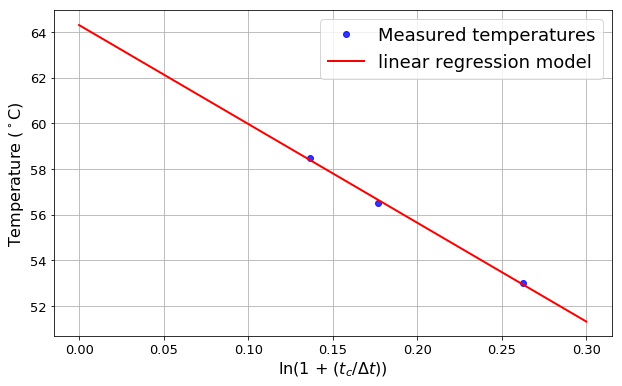

In [38]:
# plot the results
fig = plt.figure(figsize=(10,6))
dots, = plt.plot(x,T,'o', color='blue', alpha=0.8)
line, = plt.plot(x_reg,T_reg, '-', linewidth=2, color='red')
plt.xlabel('ln(1 + ($t_c/\Delta t$))', fontsize=16)
plt.ylabel('Temperature ($^\circ$C)', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.legend([dots,line], ["Measured temperatures", "linear regression model"], loc=1, fontsize=18)
plt.grid(True)
# printig the undisturbed formation temperature
print("The undisturbed formation temperature is {} °C "
      .format(np.round(np.abs(b),1)))

We know that the slope $m$ equals $\frac{Q}{4\pi \lambda}$. If the mean thermal conductivity of the rocks in the formation equals 2.2 W m$^{-1}$ K$^{-1}$, we can calculate $Q$ then.   

In [39]:
# Calculating Q
tc = 2.2
Q = 4*np.pi*tc*m
print("The heat flow per unit length Q is {} W/m (negative sign means flow into the borehole).".format(np.round(Q,0)))

The heat flow per unit length Q is -1197.0 W/m (negative sign means flow into the borehole).


Finally, we can also determine the basal het flow in the formation, when we include another measurement  of the undisturbed formation temperature at different depth. Assuming, we obtain a temperature of 61 °C at a depth of 1400 m, we can calculate the heat flow $q$ in W/m$^{2}$

In [40]:
# Calculating q
grad=(b-61)/100
q=2.2*grad*1000 
print("The heat flow in the surrounding of the borehole is {} mW/m^2.".format(np.round(np.abs(q),0)))


The heat flow in the surrounding of the borehole is 73.0 mW/m^2.
